In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [9]:
#given the size of a known box, it could be advantageous to have a buffer for potential / force values.
#Really all we'd need in SRAM is those force values for a given r distance. 

#we can use a crude Lennard-Jones potential to model that attraction at far distances and repulsion at close
#distances for the attractive molecules. 

#Potential = 25/x^4 - 10/x
#Force = 100/x^5 - 10/x^2 (positive at x < 2.154)

def get_force(r):
    #neg1 = np.full(r.shape, -1)
    if r != 0:
        return min(90, (100/r**5)-(10/r**2))
    return 0

def force_graph(r):
    return (100/r**5)-(10/r**2)
#def potential_graph(r):
#    return (25/r**4)-(10/r)
#graph = np.linspace(2,15,1000)

#forces = force_graph(graph)
#potentials = potential_graph(graph)
#plt.xlabel('Distance (Arbitrary Units)')
#plt.ylabel('Force (Arbitrary Units)')
#plt.title('Lennard-Jones Force Inside Accelerator')
#plt.plot(graph, forces, c = 'r')
#plt.savefig('L-J')
#plt.show()
#


In [10]:
np.random.seed(1337)
mol_arr10 = (np.random.randint(0, high = 10, size = (10, 3)))
#print(mol_arr10)
np.savetxt("mol_arr10.csv", mol_arr10, delimiter=",")
np.random.seed(1337)
mol_arr100 = (np.random.randint(0, high = 10, size = (100, 3)))
print(mol_arr100)
np.savetxt("mol_arr100.csv", mol_arr100, delimiter=",")
np.random.seed(1337)
mol_arr1000 = (np.random.rand(1000, 3)*10)
np.savetxt("mol_arr1000.csv", mol_arr1000, delimiter=",")


[[7 8 7]
 [9 7 2]
 [2 4 8]
 [9 6 6]
 [7 8 1]
 [6 6 2]
 [2 9 8]
 [1 7 3]
 [1 3 9]
 [3 4 8]
 [8 7 9]
 [4 1 6]
 [4 4 2]
 [5 7 4]
 [2 3 9]
 [2 4 8]
 [6 3 8]
 [8 7 4]
 [3 2 9]
 [1 2 0]
 [3 8 2]
 [1 0 1]
 [9 4 2]
 [0 0 7]
 [4 6 5]
 [6 3 0]
 [0 4 2]
 [5 9 9]
 [0 2 2]
 [7 3 6]
 [3 0 3]
 [9 0 7]
 [3 1 6]
 [1 8 3]
 [9 4 7]
 [1 6 7]
 [7 6 3]
 [5 9 4]
 [1 0 7]
 [7 2 4]
 [4 9 6]
 [1 6 2]
 [7 9 5]
 [0 5 1]
 [2 5 2]
 [1 3 1]
 [1 3 7]
 [4 7 7]
 [6 6 9]
 [4 6 4]
 [2 2 6]
 [1 8 0]
 [8 0 8]
 [3 6 2]
 [1 3 3]
 [5 9 2]
 [7 6 5]
 [6 1 6]
 [1 5 4]
 [0 1 2]
 [0 4 9]
 [5 1 1]
 [7 5 4]
 [4 7 6]
 [9 0 5]
 [5 9 2]
 [2 1 8]
 [5 0 0]
 [9 6 4]
 [7 4 7]
 [9 5 5]
 [7 1 7]
 [9 7 5]
 [9 2 9]
 [7 8 3]
 [8 2 7]
 [2 7 6]
 [8 2 0]
 [3 0 0]
 [9 3 6]
 [7 1 3]
 [4 7 7]
 [9 6 4]
 [5 8 3]
 [9 3 0]
 [1 6 9]
 [3 9 2]
 [4 3 2]
 [1 8 2]
 [8 5 3]
 [5 9 0]
 [4 3 0]
 [8 8 0]
 [4 1 0]
 [7 8 7]
 [0 0 7]
 [2 4 3]
 [4 8 5]
 [9 1 4]
 [3 3 4]]


In [11]:
mol_arr = mol_arr100
#print(mol_arr)
def timestep(dt, mol_1, mol_2):
    #print(mol_1)
    direction = np.array([mol_1[0] - mol_2[0], mol_1[1] - mol_2[1], mol_1[2] - mol_2[2]])
    r = (mol_1[0] - mol_2[0])**2 + (mol_1[1] - mol_2[1])**2 + (mol_1[2] - mol_2[2])**2
    #print(r)
    #print(get_force(r))
    #print(r)
    #print(r)
    if r != 0:
        pos_update = (dt*get_force(r)*direction)
    else: 
        pos_update = 0
    #
    #print(pos_update)
    #print(mol_1 + pos_update)
    return pos_update

def full_timestep(dt, mol_arr):
    #print(mol_arr.shape)
    timesteps = []
    for mol in mol_arr:
        cur_update = np.array([0,0,0])
        for mol2 in mol_arr:   #this will just be a memfold 
            cur_update = cur_update + timestep(dt, mol, mol2)
        timesteps.append(mol + cur_update)
    return np.array(timesteps)
        
        

In [88]:
timesteps = np.array([])

timesteps = np.append(timesteps, mol_arr)
timesteps = np.append(timesteps, full_timestep(.001, mol_arr))

#print(timesteps.shape)
timesteps = np.reshape(timesteps, (-1, 3))
timesteps = np.reshape(timesteps, (-1, 3))
np.savetxt("firstTimestep.csv", timesteps[100:, :], delimiter=",")
#102
for i in range(1000):
    j = i*100
    j1 = (i+1)*100
    timesteps = np.append(timesteps, full_timestep(.001, timesteps[j:j1]))
    timesteps = np.reshape(timesteps, (-1, 3))
    if(i%100 == 0):
        print(str(i/10) + " percent done")
print(timesteps)
print(timesteps.shape)

0.0 percent done
10.0 percent done
20.0 percent done
30.0 percent done
40.0 percent done
50.0 percent done
60.0 percent done
70.0 percent done
80.0 percent done
90.0 percent done
[[7.         8.         7.        ]
 [9.         7.         2.        ]
 [2.         4.         8.        ]
 ...
 [3.97278757 6.71828931 4.20344524]
 [6.54996836 2.99312247 4.562785  ]
 [4.21461477 3.97025672 4.41350325]]
(100200, 3)


In [7]:
#print(timesteps)

fig = plt.figure()
ax = plt.axes(projection='3d')

for row in mol_arr:
    ax.scatter3D(row[0], row[1], row[2])

for row in timesteps:
    ax.scatter3D(row[0], row[1], row[2])

Error in callback <function flush_figures at 0x7fe6eb331820> (for post_execute):


KeyboardInterrupt: 

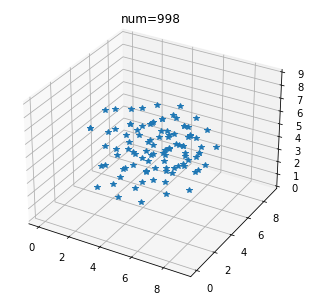

In [89]:
import mpl_toolkits.mplot3d.axes3d as p3


fig = plt.figure()
ax = p3.Axes3D(fig)

x=timesteps[0:100,0]
y=timesteps[0:100,1]
z=timesteps[0:100,2]



points, = ax.plot(x, y, z, '*')
txt = fig.suptitle('')
i = 0

def update_points(num, x, y, z, points):
    global i
    i+=1
    i1 = i*100
    i2 = (i+1)*100
    txt.set_text('num={:d}'.format(num)) # for debug purposes

    # calculate the new sets of coordinates here. The resulting arrays should have the same shape
    # as the original x,y,z
    new_x = timesteps[i1:i2,0]
    new_y = timesteps[i1:i2,1]
    new_z = timesteps[i1:i2,2]
    #print(new_x)
    # update properties
    points.set_data(new_x,new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points,txt

ani=animation.FuncAnimation(fig, update_points, interval = 25, frames=999, fargs=(x, y, z, points), blit = False)

ani.save(filename="pillow_example.gif", writer="pillow")
plt.show()
#ani.save(filename="/tmp/pillow_example.gif", writer="pillow")


0.19535976941456742
0.10407476792462567

0.043631621247558705
0.011067404599583996
0.0027000641851611107
0.0006923737054032042
0.0001738077235415858
4.2505290476668733e-05
1.0635609703157911e-05


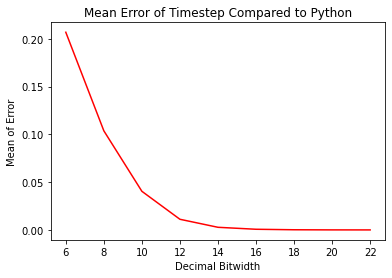

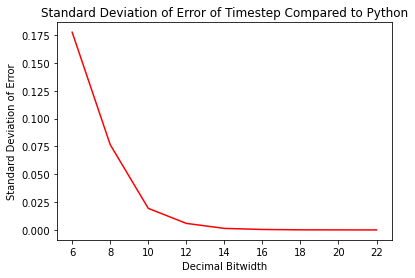

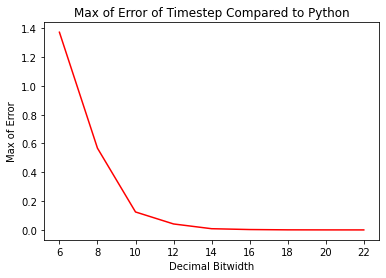

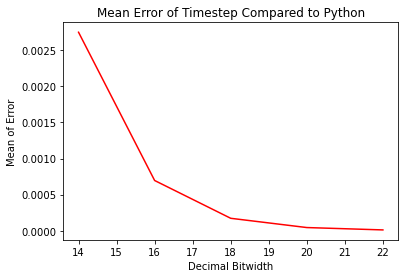

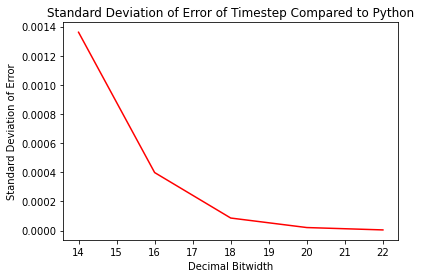

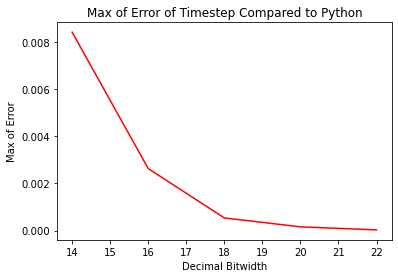

In [47]:
arr = np.loadtxt("output.csv",
                 delimiter=",", dtype=float)
arr = np.reshape(arr, (-1, 3))
#print(arr)
arr2 = np.loadtxt("output_low_bitwidth.csv",
                 delimiter=",", dtype=float)
arr2 = np.reshape(arr2, (-1, 3))

arr8 = np.loadtxt("output_8.csv",
                 delimiter=",", dtype=float)
arr8 = np.reshape(arr8, (-1, 3))

arr10 = np.loadtxt("output_10.csv",
                 delimiter=",", dtype=float)
arr10 = np.reshape(arr10, (-1, 3))

arr12 = np.loadtxt("output_12.csv",
                 delimiter=",", dtype=float)
arr12 = np.reshape(arr12, (-1, 3))

arr14 = np.loadtxt("output_14.csv",
                 delimiter=",", dtype=float)
arr14 = np.reshape(arr14, (-1, 3))

arr16 = np.loadtxt("output_16.csv",
                 delimiter=",", dtype=float)
arr16 = np.reshape(arr16, (-1, 3))

arr18 = np.loadtxt("output_18.csv",
                 delimiter=",", dtype=float)
arr18 = np.reshape(arr18, (-1, 3))


arr20 = np.loadtxt("output_20.csv",
                 delimiter=",", dtype=float)
arr20 = np.reshape(arr20, (-1, 3))

pyarr = full_timestep(.1, mol_arr100)

#print(pyarr)
errors22 = []
for i in range(100):
    for j in range(3):
        errors22.append(abs(arr[i,j] - pyarr[i,j]))
        
errors6 = []
for i in range(100):
    for j in range(3):
        errors6.append(abs(arr2[i,j] - pyarr[i,j]))
        
errors8 = []
for i in range(100):
    for j in range(3):
        errors8.append(abs(arr8[i,j] - pyarr[i,j]))
        
errors10 = []
for i in range(100):
    for j in range(3):
        errors10.append(abs(arr10[i,j] - pyarr[i,j]))
        
errors12 = []
for i in range(100):
    for j in range(3):
        errors12.append(abs(arr12[i,j] - pyarr[i,j]))
        
errors14 = []
for i in range(100):
    for j in range(3):
        errors14.append(abs(arr14[i,j] - pyarr[i,j]))
        
errors16 = []
for i in range(100):
    for j in range(3):
        errors16.append(abs(arr16[i,j] - pyarr[i,j]))

errors18 = []
for i in range(100):
    for j in range(3):
        errors18.append(abs(arr18[i,j] - pyarr[i,j]))
        
errors20 = []
for i in range(100):
    for j in range(3):
        errors20.append(abs(arr20[i,j] - pyarr[i,j]))

means = []
std = []
maxes = []

means.append(np.mean(errors6))
print(np.median(errors6))
std.append(np.std(errors6))
maxes.append(np.max(errors6))

means.append(np.mean(errors8))
print(np.median(errors8))
std.append(np.std(errors8))
maxes.append(np.max(errors8))
print("")
means.append(np.mean(errors10))
print(np.median(errors10))
std.append(np.std(errors10))
maxes.append(np.max(errors10))

means.append(np.mean(errors12))
print(np.median(errors12))
std.append(np.std(errors12))
maxes.append(np.max(errors12))

means.append(np.mean(errors14))
print(np.median(errors14))
std.append(np.std(errors14))
maxes.append(np.max(errors14))

means.append(np.mean(errors16))
print(np.median(errors16))
std.append(np.std(errors16))
maxes.append(np.max(errors16))

means.append(np.mean(errors18))
print(np.median(errors18))
std.append(np.std(errors18))
maxes.append(np.max(errors18))

means.append(np.mean(errors20))
print(np.median(errors20))
std.append(np.std(errors20))
maxes.append(np.max(errors20))

means.append(np.mean(errors22))
print(np.median(errors22))
std.append(np.std(errors22))
maxes.append(np.max(errors22))

xvals = [6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.plot(xvals, means, c = 'r')
plt.title("Mean Error of Timestep Compared to Python")
plt.xlabel("Decimal Bitwidth")
plt.ylabel("Mean of Error")
plt.savefig('means')
plt.show()
plt.plot(xvals, std, c = 'r')
plt.title("Standard Deviation of Error of Timestep Compared to Python")
plt.xlabel("Decimal Bitwidth")
plt.ylabel("Standard Deviation of Error")
plt.savefig('std')
plt.show()
plt.plot(xvals, maxes, c = 'r')
plt.title("Max of Error of Timestep Compared to Python")
plt.xlabel("Decimal Bitwidth")
plt.ylabel("Max of Error")
plt.savefig('max')
plt.show()

plt.plot(xvals[4:], means[4:], c = 'r')
plt.title("Mean Error of Timestep Compared to Python")
plt.xlabel("Decimal Bitwidth")
plt.ylabel("Mean of Error")
plt.savefig('means_zoom')
plt.show()
plt.plot(xvals[4:], std[4:], c = 'r')
plt.title("Standard Deviation of Error of Timestep Compared to Python")
plt.xlabel("Decimal Bitwidth")
plt.ylabel("Standard Deviation of Error")
plt.savefig('std_zoom')
plt.show()
plt.plot(xvals[4:], maxes[4:], c = 'r')
plt.title("Max of Error of Timestep Compared to Python")
plt.xlabel("Decimal Bitwidth")
plt.ylabel("Max of Error")
plt.savefig('max_zoom')
plt.show()

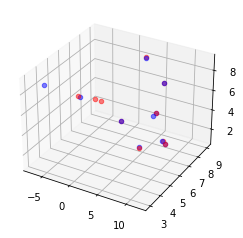

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for row in mol_arr10:
    ax.scatter3D(row[0], row[1], row[2], c = 'r', alpha = .5)
for row in arr:
    ax.scatter3D(row[0], row[1], row[2], c = 'b', alpha = .5)

#maybe some underflow somewhere?

In [45]:
print(arr)
print(mol_arr10)

for i in range(10):
    print(np.linalg.norm(arr[i] - mol_arr10[i]))

[[ 7.00854564  7.96620679  6.97399259]
 [ 8.91013002  7.01346397  1.99588108]
 [-7.06309414  3.94483709  8.06123877]
 [ 8.95928884  6.02850914  5.98944378]
 [ 7.02225852  7.91684771  1.06707835]
 [ 6.05091763  6.06537509  1.99386787]
 [ 2.01119757  8.97484851  7.98963284]
 [ 1.01922464  6.99561286  3.01448774]
 [ 1.1278336   3.10470796  8.89776921]
 [11.95368814  3.98958111  8.01659799]]
[[7 8 7]
 [9 7 2]
 [2 4 8]
 [9 6 6]
 [7 8 1]
 [6 6 2]
 [2 9 8]
 [1 7 3]
 [1 3 9]
 [3 4 8]]
0.04349016668663051
0.09096623926896967
9.063468900309033
0.05080948513043285
0.10912951500727087
0.08309097359392831
0.02941871714724545
0.024468932008437298
0.19430985693521294
8.953709590929732


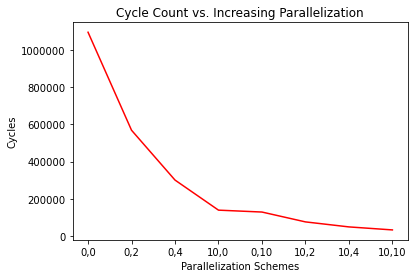

In [25]:
cycle_counts = [1096685, 569016, 300616, 138616, 128397, 75346, 48346, 32146]
labels = ["0,0", "0,2", "0,4", "10,0", "0,10", "10,2", "10,4", "10,10"]
plt.ticklabel_format(style = 'plain')
plt.plot(labels, cycle_counts, color = 'r')
plt.xlabel("Parallelization Schemes")
plt.ylabel("Cycles")
plt.title("Cycle Count vs. Increasing Parallelization")
plt.savefig("parallelism")
#0,0 0,2 0,4 10,0 0,10 10,2 10,4 10,10